# Text classification

### Necessary Libraries

In [1]:
# libraries for dataset preparation, feature engineering, model training 
import numpy as np
import os
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing, linear_model, svm
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import ast
import os
from keras.layers import Dense, Embedding, Input
from keras.layers import GRU, Dropout, MaxPooling1D, Conv1D, Flatten, BatchNormalization, GlobalMaxPool1D
from keras.models import Model, Sequential
import matplotlib.pyplot as plt
import numpy as np
import itertools
from keras.utils import np_utils
from sklearn.metrics import (classification_report, 
                             precision_recall_fscore_support, 
                             accuracy_score)

from keras.preprocessing import text, sequence
import seaborn as sns
%matplotlib inline

C:\Users\Ilyas\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Loding data

In [29]:
# load dataframe from CSV file
df_train = pd.read_csv("../Data/classes.csv", sep=",")
df_dev = pd.read_csv("../Data/classes_dev.csv", sep=",")
df_train[0:10]

,Filename,Text,Class,Language
0,AAAWNA.txt,REPUBLIQUE FRANCAISE Nationalité Française Car...,C2,fr
1,AAUVHC.txt,17 08 12 15:10 MLTC 00212537680032 p.2 في ليلة...,C3,ar
2,ABBABC.txt,Hi sweetie ! just a quick note to say ... HAPP...,C3,en
3,ABBABD.txt,BE THE CHANGE YOU WANT TO SEE IN THE WORLD !,C3,en
4,ABBABE.txt,scenario 1 Bridgewater House Barlow Street Wor...,C3,en
5,ABBABF.txt,remember - Jane got 100 % on the vast test she...,C3,en
6,ABBACE.txt,- get map from hostel - get Euros visit eat . ...,C3,en
7,ABBADF.txt,"Hi Lucie, The postman left your delivery with ...",C3,en
8,ABBAGH.txt,"To whom it may concern, I am writing to inform...",C3,en
9,ABBAJL.txt,"Dear Jay, I hope ¤{eveything/everything}¤ is o...",C3,en


### Class classification

labels:                ['C1', 'C2', 'C3', 'C4', 'C5']
-----------------------------------------------------
Count train elements:  [ 778 2723 1383 1039  206]
-----------------------------------------------------
Count dev elements:    [146 426 212 169  47]
-----------------------------------------------------
Distribution of classes in train and dev dataset: 


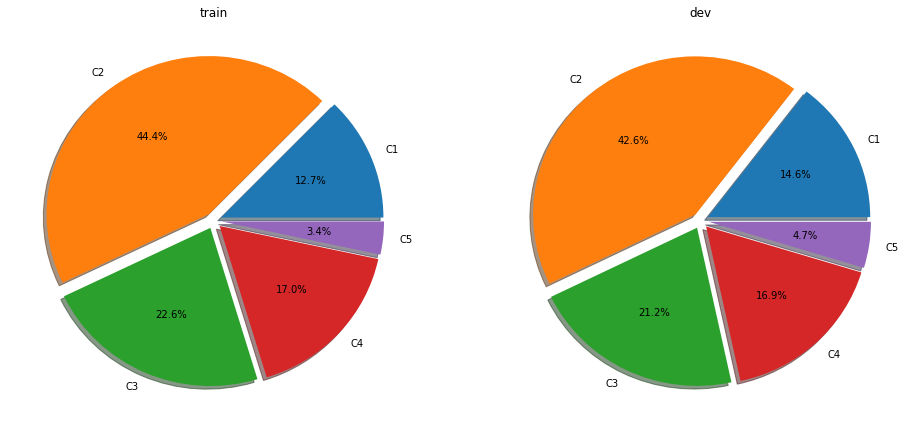

In [81]:
# Data for class classif
Xtrain = df_train['Text']
ytrain = df_train['Class']
Xdev = df_dev['Text']
ydev = df_dev['Class']

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
ytrain = encoder.fit_transform(ytrain)
ydev = encoder.fit_transform(ydev)
labels = ['C1','C2','C3','C4','C5']

# Plot the statistics
unique, counts_train = np.unique(ytrain, return_counts=True)
unique, counts_dev = np.unique(ydev, return_counts=True)

# counts_train =df_train["Class"].value_counts()
# counts_dev =df_dev["Class"].value_counts()

print('labels:               ',labels)
print('-----------------------------------------------------')
print('Count train elements: ',counts_train)
print('-----------------------------------------------------')
print('Count dev elements:   ',counts_dev)
print('-----------------------------------------------------')
print('Distribution of classes in train and dev dataset: ')
explode = (0.05, 0.05, 0.05, 0.05 ,0.05)  
plt.figure(figsize=(16,16))
plt.subplot(2, 2, 1)
plt.title('train')
plt.pie(counts_train, explode=explode,labels = labels, autopct='%1.1f%%',shadow = True)
plt.subplot(2, 2, 2)
plt.title('dev')
plt.pie(counts_dev, explode=explode,labels = labels, autopct='%1.1f%%',shadow = True)
plt.show()


- Test different statistic classifier

    - Countvectoriser

In [51]:
# Split data
Xval, Xtest, yval, ytest = train_test_split(Xdev, ydev, test_size=0.4)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
ytrain = encoder.fit_transform(ytrain)
yval = encoder.fit_transform(yval)
ytest = encoder.fit_transform(ytest)
labels = ['C1','C2','C3','C4','C5']

# Plot the statistics
counts_train =Xtrain.value_counts()
counts_val =Xval.value_counts()
counts_test =Xtest.value_counts()

# Create document vectors:
vectorizer = CountVectorizer(max_features=3000,analyzer='word', token_pattern=r'\w{1,}')
vectorizer.fit(df_train['Text'])
X_train_counts = vectorizer.transform(Xtrain)
X_val_counts = vectorizer.transform(Xval)
X_test_counts = vectorizer.transform(Xtest)


# train a Naive Bayes classifier:
print('----------------------------------------------------')
clf = MultinomialNB()
clf.fit(X_train_counts,ytrain)
score_val = clf.score(X_val_counts,yval)
print('***** Validation of Naive Bayes classifier *******')
print('Score : ',score_val)
# predict test classes:
print('Prediction of classes in test dataset: \n')
ypred = clf.predict(X_test_counts)
print(classification_report(ytest, ypred))
print('Confusion matrix : \n',confusion_matrix(ytest, ypred))

# Linear classifier
print('\n----------------------------------------------------')
lc = linear_model.LogisticRegression()
lc.fit(X_train_counts,ytrain)
score_val = lc.score(X_val_counts,yval)
print('***** Validation of linear classifier *****')
print('Score : ',score_val)
# predict test classes:
print('Prediction of classes in test dataset: \n')
ypred = lc.predict(X_test_counts)
print(classification_report(ytest, ypred))
print('Confusion matrix : \n',confusion_matrix(ytest, ypred))

# svm 
print('\n----------------------------------------------------')
sm = svm.SVC()
sm.fit(X_train_counts,ytrain)
score_val = sm.score(X_val_counts,yval)
print('***** Validation of svm classifier *****')
print('Score : ',score_val)
# predict test classes:
print('Prediction of classes in test dataset: \n')
ypred = sm.predict(X_test_counts)
print(classification_report(ytest, ypred))
print('Confusion matrix : \n',confusion_matrix(ytest, ypred))

----------------------------------------------------
***** Validation of Naive Bayes classifier *******
Score :  0.715
Prediction of classes in test dataset: 

             precision    recall  f1-score   support

          0       0.74      0.82      0.78        60
          1       0.94      0.68      0.79       167
          2       0.63      0.80      0.71        83
          3       0.63      0.74      0.68        70
          4       0.61      0.85      0.71        20

avg / total       0.78      0.74      0.75       400

Confusion matrix : 
 [[ 49   5   1   3   2]
 [ 17 113  18  10   9]
 [  0   0  66  17   0]
 [  0   2  16  52   0]
 [  0   0   3   0  17]]

----------------------------------------------------
***** Validation of linear classifier *****
Score :  0.895
Prediction of classes in test dataset: 

             precision    recall  f1-score   support

          0       1.00      0.93      0.97        60
          1       0.95      0.97      0.96       167
          2    

    - TF-IDF 

In [54]:
# Split data
Xval, Xtest, yval, ytest = train_test_split(Xdev, ydev, test_size=0.4)

# N-gram level tf-idf:
vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,5), max_features=1000)
vectorizer.fit(df_train['Text'])

# Create document vectors:
X_train_counts = vectorizer.transform(Xtrain)
X_val_counts = vectorizer.transform(Xval)
X_test_counts = vectorizer.transform(Xtest)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
ytrain = encoder.fit_transform(ytrain)
yval = encoder.fit_transform(yval)
ytest = encoder.fit_transform(ytest)
labels = ['C1','C2','C3','C4','C5']

# Plot the statistics
counts_train =Xtrain.value_counts()
counts_val =Xval.value_counts()
counts_test =Xtest.value_counts()

# train a Naive Bayes classifier:
print('----------------------------------------------------')
clf = MultinomialNB()
clf.fit(X_train_counts,ytrain)
score_val = clf.score(X_val_counts,yval)
print('***** Validation of Naive Bayes classifier *******')
print('Score : ',score_val)
# predict test classes:
print('Prediction of classes in test dataset: \n')
ypred = clf.predict(X_test_counts)
print(classification_report(ytest, ypred))
print('Confusion matrix : \n',confusion_matrix(ytest, ypred))

# Linear classifier
print('\n----------------------------------------------------')
lc = linear_model.LogisticRegression()
lc.fit(X_train_counts,ytrain)
score_val = lc.score(X_val_counts,yval)
print('***** Validation of linear classifier *****')
print('Score : ',score_val)
# predict test classes:
print('Prediction of classes in test dataset: \n')
ypred = lc.predict(X_test_counts)
print(classification_report(ytest, ypred))
print('Confusion matrix : \n',confusion_matrix(ytest, ypred))

# svm 
print('\n----------------------------------------------------')
sm = svm.SVC()
sm.fit(X_train_counts,ytrain)
score_val = sm.score(X_val_counts,yval)
print('***** Validation of svm classifier *****')
print('Score : ',score_val)
# predict test classes:
print('Prediction of classes in test dataset: \n')
ypred = sm.predict(X_test_counts)
print(classification_report(ytest, ypred))
print('Confusion matrix : \n',confusion_matrix(ytest, ypred))

----------------------------------------------------
***** Validation of Naive Bayes classifier *******
Score :  0.7
Prediction of classes in test dataset: 

             precision    recall  f1-score   support

          0       0.85      0.71      0.78        66
          1       0.70      0.90      0.78       172
          2       0.65      0.76      0.70        84
          3       0.57      0.23      0.33        56
          4       1.00      0.05      0.09        22

avg / total       0.71      0.70      0.66       400

Confusion matrix : 
 [[ 47  17   1   1   0]
 [  8 155   6   3   0]
 [  0  14  64   6   0]
 [  0  16  27  13   0]
 [  0  21   0   0   1]]

----------------------------------------------------
***** Validation of linear classifier *****
Score :  0.7133333333333334
Prediction of classes in test dataset: 

             precision    recall  f1-score   support

          0       0.89      0.77      0.83        66
          1       0.73      0.94      0.82       172
    

C:\Users\Ilyas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- CNN classifier:

In [84]:
def get_train_test(train_raw_text, test_raw_text):
    
    tokenizer = text.Tokenizer(num_words=MAX_FEATURES, )

    tokenizer.fit_on_texts(list(train_raw_text))
    train_tokenized = tokenizer.texts_to_sequences(train_raw_text)
    test_tokenized = tokenizer.texts_to_sequences(test_raw_text)
    return sequence.pad_sequences(train_tokenized, maxlen=MAX_TEXT_LENGTH), \
           sequence.pad_sequences(test_tokenized, maxlen=MAX_TEXT_LENGTH)

def get_model(n_classes=5):

    inp = Input(shape=(MAX_TEXT_LENGTH,))
    model = Embedding(MAX_FEATURES, EMBED_SIZE)(inp)
    
    model = Conv1D(filters=32, kernel_size=7, padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=2)(model)
    model = BatchNormalization(axis=1)(model)
    model = Dropout(0.2)(model)
    
    model = Conv1D(filters=64, kernel_size=5, padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=3)(model)
    model = BatchNormalization(axis=1)(model)
    model = Dropout(0.3)(model)
    
    model = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=5)(model)
    model = BatchNormalization(axis=1)(model)
    model = Dropout(0.5)(model)
    
    model = Flatten()(model)
    model = Dense(250, activation="relu")(model)
    model = Dense(n_classes, activation="softmax")(model)
    
    model = Model(inputs=inp, outputs=model)
    
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    model.summary()
    
    return model


- Training model

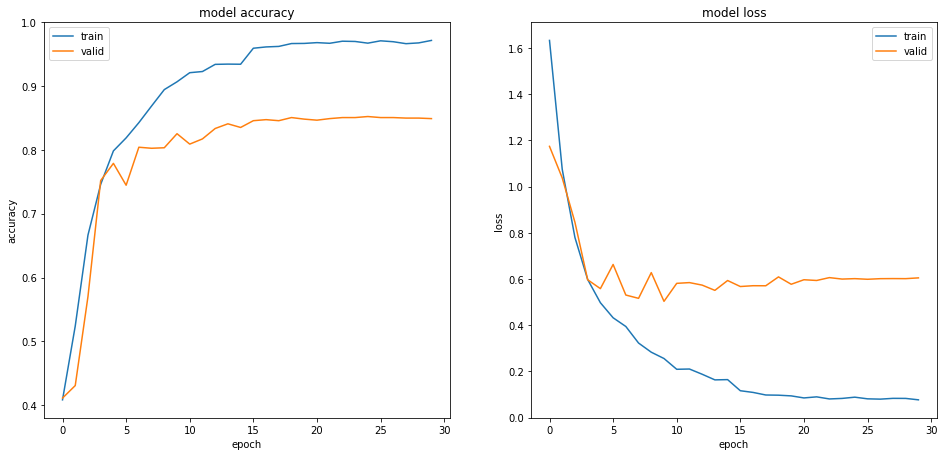

In [87]:
# Model parameters
MAX_FEATURES = 500
MAX_TEXT_LENGTH = 700
EMBED_SIZE  = 64
BATCH_SIZE = 128
EPOCHS = 30
VALIDATION_SPLIT = 0.2

# Get the list of different classes
CLASSES_LIST = np.unique(ytrain)
n_out = len(CLASSES_LIST)
print(CLASSES_LIST)

# Data for class classif
Xtrain = df_train['Text']
ytrain = df_train['Class']
Xdev = df_dev['Text']
ydev = df_dev['Class']

# Data for class classif
Xtrain = df_train['Text']
ytrain = df_train['Class']
Xdev = df_dev['Text']
ydev = df_dev['Class']

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
ytrain = encoder.fit_transform(ytrain)
ydev = encoder.fit_transform(ydev)
# Convert class string to index
train_y_cat = np_utils.to_categorical(ytrain, n_out)
test_y_cat = np_utils.to_categorical(ydev, n_out)

# get the textual data in the correct format for NN
x_vec_train, x_vec_test = get_train_test(Xtrain, Xdev)
print(len(x_vec_train), len(x_vec_test))

# define the NN topology
model = get_model()

# Create callbacks
filepath = 'weight_class_text' + '.hdf5'
multi_checkpointer = ModelCheckpoint(filepath=filepath, verbose=0)
multi_lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=0, factor=0.2)

# Train 
print('Training ....')
history = model.fit(x_vec_train, train_y_cat,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS, verbose=1, validation_split=VALIDATION_SPLIT,callbacks=[multi_checkpointer,multi_lr_reduction])

# Plot results
plt.figure(figsize=(16,16))

# summarize history for accuracy
plt.subplot(2, 2, 1)
plt.title('train')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')

# summarize history for loss
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

Labels:                ['C1', 'C2', 'C3', 'C4', 'C5']
-----------------------------------------------------
Count pred elements:  [139 451 275 106  29]
Count dev elements:    [146 426 212 169  47]
-----------------------------------------------------
Distribution of classes in predicted and dev dataset: 


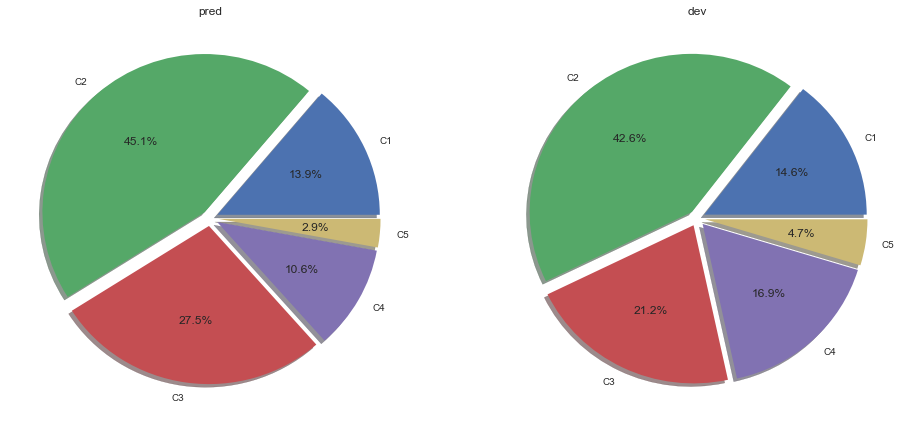

-----------------------------------------------------
Test accuracy:     0.82   
Test error:     0.18   
------------------------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.95      0.97       146
          1       0.88      0.93      0.91       426
          2       0.65      0.84      0.73       212
          3       0.76      0.48      0.59       169
          4       0.90      0.55      0.68        47

avg / total       0.83      0.82      0.81      1000

------------------------------------------------------
Confusion matrix: 



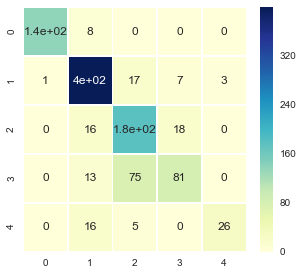

In [90]:
# Matrice de probabilitées d'appartenance à chaque classe
ypredicted = model.predict(x_vec_test)

ypred = np.zeros(len(ydev))
for i in range(len(y_predicted)):
    ypred[i] = np.argmax(ypredicted[i])
    
# number of element in each class
unique, counts_pred = np.unique(ypred, return_counts=True)
unique, counts_dev = np.unique(ydev, return_counts=True)

print('Labels:               ',labels)
print('-----------------------------------------------------')
print('Count pred elements: ',counts_pred)
print('Count dev elements:   ',counts_dev)
print('-----------------------------------------------------')
print('Distribution of classes in predicted and dev dataset: ')
explode = (0.05, 0.05, 0.05, 0.05 ,0.05)  
plt.figure(figsize=(16,16))
plt.subplot(2, 2, 1)
plt.title('pred')
plt.pie(counts_pred, explode=explode,labels = labels, autopct='%1.1f%%',shadow = True)
plt.subplot(2, 2, 2)
plt.title('dev')
plt.pie(counts_dev, explode=explode,labels = labels, autopct='%1.1f%%',shadow = True)
plt.show()

# Performance
print('-----------------------------------------------------')
print("Test accuracy: ",'{:^10.2f}'.format(accuracy_score(ypred, ydev)))
print("Test error: ",'{:^10.2f}'.format(1-accuracy_score(ypred, ydev)))
print('------------------------------------------------------')
p, r, f1, s = precision_recall_fscore_support(ydev, ypred, 
                                              average='micro',
                                              labels=[x for x in 
                                                      np.unique(ydev) 
                                                      if x not in ['CSDECMOTV']])

print(classification_report(ydev, ypred, labels=[x for x in 
                                                       np.unique(ydev) 
                                                       if x not in ['CSDECMOTV']]))
print('------------------------------------------------------')
print('Confusion matrix: \n')
sns.set(rc={'figure.figsize':(5,4.5)})
cm_data = confusion_matrix(ydev, ypred)
cm = sns.heatmap(cm_data, annot=True, cmap="YlGnBu", linewidths=.5)

### Language classification

labels:                ['fr', 'ar', 'en']
-----------------------------------------------------
Count train elements: 
fr    3080
ar    1536
en    1513
Name: Language, dtype: int64
-----------------------------------------------------
Count dev elements:   
fr    501
en    251
ar    248
Name: Language, dtype: int64
-----------------------------------------------------
Distribution of classes in train and dev dataset: 


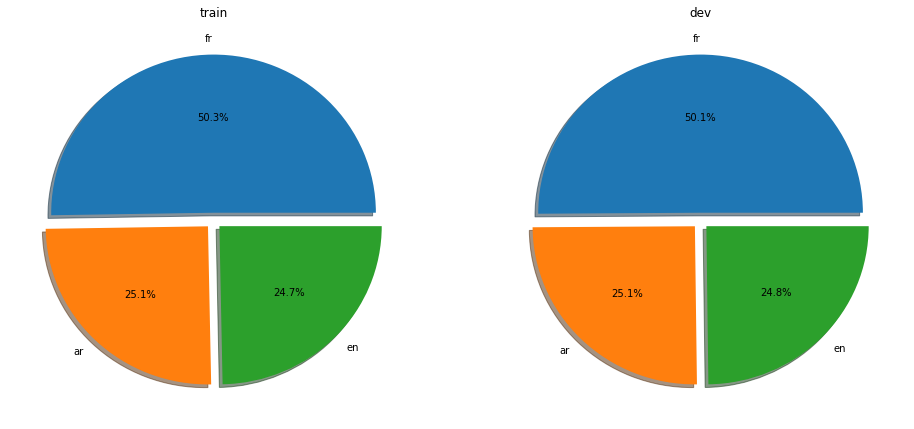

In [78]:
# Data for class classif
Xtrain = df_train['Text']
ytrain = df_train['Language']
Xdev = df_dev['Text']
ydev = df_dev['Language']

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
ytrain = encoder.fit_transform(ytrain)
ydev = encoder.fit_transform(ydev)
labels = ['fr','ar','en']

# Plot the statistics
unique, counts_train = np.unique(ytrain, return_counts=True)
unique, counts_dev = np.unique(ydev, return_counts=True)

counts_train =df_train["Language"].value_counts()
counts_dev =df_dev["Language"].value_counts()

print('labels:               ',labels)
print('-----------------------------------------------------')
print('Count train elements: ')
print(counts_train)
print('-----------------------------------------------------')
print('Count dev elements:   ')
print(counts_dev)
print('-----------------------------------------------------')
print('Distribution of classes in train and dev dataset: ')
explode = (0.05, 0.05, 0.05)  
plt.figure(figsize=(16,16))
plt.subplot(2, 2, 1)
plt.title('train')
plt.pie(counts_train, explode=explode,labels = labels, autopct='%1.1f%%',shadow = True)
plt.subplot(2, 2, 2)
plt.title('dev')
plt.pie(counts_dev, explode=explode,labels = labels, autopct='%1.1f%%',shadow = True)
plt.show()


- CountVectorizer

In [57]:
# Split data
Xval, Xtest, yval, ytest = train_test_split(Xdev, ydev, test_size=0.4)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
ytrain = encoder.fit_transform(ytrain)
yval = encoder.fit_transform(yval)
ytest = encoder.fit_transform(ytest)

# Plot the statistics
counts_train =Xtrain.value_counts()
counts_val =Xval.value_counts()
counts_test =Xtest.value_counts()

# Create document vectors:
vectorizer = CountVectorizer(max_features=3000,analyzer='word', token_pattern=r'\w{1,}')
vectorizer.fit(df_train['Text'])
X_train_counts = vectorizer.transform(Xtrain)
X_val_counts = vectorizer.transform(Xval)
X_test_counts = vectorizer.transform(Xtest)


# train a Naive Bayes classifier:
print('----------------------------------------------------')
clf = MultinomialNB()
clf.fit(X_train_counts,ytrain)
score_val = clf.score(X_val_counts,yval)
print('***** Validation of Naive Bayes classifier *******')
print('Score : ',score_val)
# predict test classes:
print('Prediction of classes in test dataset: \n')
ypred = clf.predict(X_test_counts)
print(classification_report(ytest, ypred))
print('Confusion matrix : \n',confusion_matrix(ytest, ypred))

# Linear classifier
print('\n----------------------------------------------------')
lc = linear_model.LogisticRegression()
lc.fit(X_train_counts,ytrain)
score_val = lc.score(X_val_counts,yval)
print('***** Validation of linear classifier *****')
print('Score : ',score_val)
# predict test classes:
print('Prediction of classes in test dataset: \n')
ypred = lc.predict(X_test_counts)
print(classification_report(ytest, ypred))
print('Confusion matrix : \n',confusion_matrix(ytest, ypred))

# svm 
print('\n----------------------------------------------------')
sm = svm.SVC()
sm.fit(X_train_counts,ytrain)
score_val = sm.score(X_val_counts,yval)
print('***** Validation of svm classifier *****')
print('Score : ',score_val)
# predict test classes:
print('Prediction of classes in test dataset: \n')
ypred = sm.predict(X_test_counts)
print(classification_report(ytest, ypred))
print('Confusion matrix : \n',confusion_matrix(ytest, ypred))

----------------------------------------------------
***** Validation of Naive Bayes classifier *******
Score :  0.9883333333333333
Prediction of classes in test dataset: 

             precision    recall  f1-score   support

          0       0.97      0.95      0.96       101
          1       0.99      0.98      0.98        97
          2       0.97      0.99      0.98       202

avg / total       0.98      0.97      0.97       400

Confusion matrix : 
 [[ 96   1   4]
 [  0  95   2]
 [  3   0 199]]

----------------------------------------------------
***** Validation of linear classifier *****
Score :  0.9916666666666667
Prediction of classes in test dataset: 

             precision    recall  f1-score   support

          0       0.97      0.98      0.98       101
          1       0.99      0.98      0.98        97
          2       1.00      1.00      1.00       202

avg / total       0.99      0.99      0.99       400

Confusion matrix : 
 [[ 99   1   1]
 [  2  95   0]
 [  1 

- TF-IDF

In [80]:
# Split data
Xval, Xtest, yval, ytest = train_test_split(Xdev, ydev, test_size=0.4)

# N-gram level tf-idf:
vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,5), max_features=1000)
vectorizer.fit(df_train['Text'])

# Create document vectors:
X_train_counts = vectorizer.transform(Xtrain)
X_val_counts = vectorizer.transform(Xval)
X_test_counts = vectorizer.transform(Xtest)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
ytrain = encoder.fit_transform(ytrain)
yval = encoder.fit_transform(yval)
ytest = encoder.fit_transform(ytest)
labels = ['fr','C2','C3','C4','C5']

# Plot the statistics
counts_train =Xtrain.value_counts()
counts_val =Xval.value_counts()
counts_test =Xtest.value_counts()

# train a Naive Bayes classifier:
print('----------------------------------------------------')
clf = MultinomialNB()
clf.fit(X_train_counts,ytrain)
score_val = clf.score(X_val_counts,yval)
print('***** Validation of Naive Bayes classifier *******')
print('Score : ',score_val)
# predict test classes:
print('Prediction of classes in test dataset: \n')
ypred = clf.predict(X_test_counts)
print(classification_report(ytest, ypred))
print('Confusion matrix : \n',confusion_matrix(ytest, ypred))

# Linear classifier
print('\n----------------------------------------------------')
lc = linear_model.LogisticRegression()
lc.fit(X_train_counts,ytrain)
score_val = lc.score(X_val_counts,yval)
print('***** Validation of linear classifier *****')
print('Score : ',score_val)
# predict test classes:
print('Prediction of classes in test dataset: \n')
ypred = lc.predict(X_test_counts)
print(classification_report(ytest, ypred))
print('Confusion matrix : \n',confusion_matrix(ytest, ypred))

# svm 
print('\n----------------------------------------------------')
sm = svm.SVC()
sm.fit(X_train_counts,ytrain)
score_val = sm.score(X_val_counts,yval)
print('***** Validation of svm classifier *****')
print('Score : ',score_val)
# predict test classes:
print('Prediction of classes in test dataset: \n')
ypred = sm.predict(X_test_counts)
print(classification_report(ytest, ypred))
print('Confusion matrix : \n',confusion_matrix(ytest, ypred))

----------------------------------------------------
***** Validation of Naive Bayes classifier *******
Score :  0.8833333333333333
Prediction of classes in test dataset: 

             precision    recall  f1-score   support

          0       0.85      0.64      0.73        87
          1       0.99      0.82      0.90       100
          2       0.82      0.97      0.89       213

avg / total       0.87      0.86      0.86       400

Confusion matrix : 
 [[ 56   0  31]
 [  5  82  13]
 [  5   1 207]]

----------------------------------------------------
***** Validation of linear classifier *****
Score :  0.91
Prediction of classes in test dataset: 

             precision    recall  f1-score   support

          0       0.74      0.93      0.82        87
          1       0.94      0.85      0.89       100
          2       0.98      0.92      0.95       213

avg / total       0.92      0.91      0.91       400

Confusion matrix : 
 [[ 81   4   2]
 [ 14  85   1]
 [ 15   1 197]]

---

C:\Users\Ilyas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
